#  Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv',index_col=False)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#  First 5 rows present in data

In [4]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1153,9.6,0.42,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,6
1102,6.1,0.48,0.09,1.7,0.078,18.0,30.0,0.99402,3.45,0.54,11.2,6
522,8.2,0.39,0.49,2.3,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
582,11.7,0.49,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2,5
894,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8,6


#  Random rows present in data can give what types of data

In [5]:
df.shape

(1599, 12)

# 
There is 1599 rows and 12 columns in data

In [6]:
print(df.duplicated().sum())
df[df.duplicated()]

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


# There is 240 duplicate value present in data so we drop this values

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(1359, 12)

In [9]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')>

# After droping duplicate value Now 1359 rows and 12 column present in data

In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# There is no null value present in data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


# All columns are float data except quality column 

# Let's check the unique value for each column

In [12]:
for i in df.columns:
    print (df[i].value_counts())
    print ('\n')

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0


 5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64 



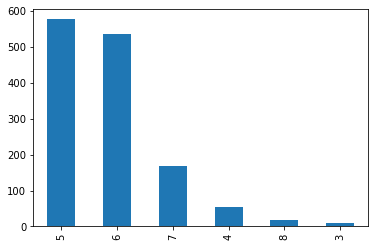

In [13]:
print("\n",df['quality'].value_counts(),"\n")

df['quality'].value_counts().plot(kind='bar')
plt.show()

# The target variable (quality) has not sufficient data to all varients so there is data imbalancing
  

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA

# Let's check how many column is contribute to target variable

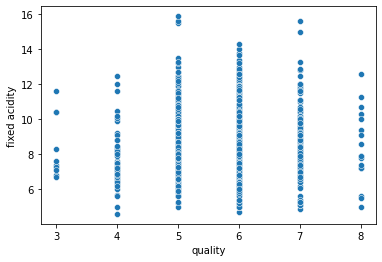


fixed acidity are contribute target variable



In [15]:
sns.scatterplot(data=df,x= 'quality',y= 'fixed acidity')
plt.show()
print('\nfixed acidity are contribute target variable\n')

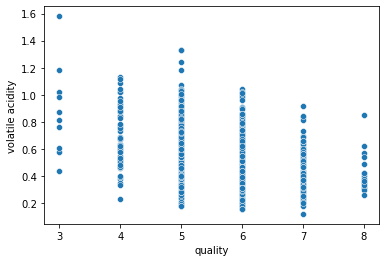


volatile acidity are contribute target variable
 


In [16]:
sns.scatterplot(data=df,x='quality',y='volatile acidity')
plt.show()
print('\nvolatile acidity are contribute target variable\n ')

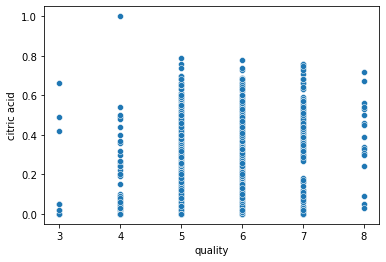


citric acid are contribute target variable
 


In [17]:
sns.scatterplot(data=df,x='quality',y='citric acid')
plt.show()
print('\ncitric acid are contribute target variable\n ')

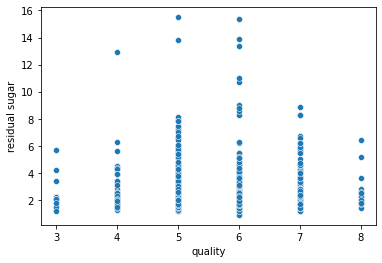


residual sugar are contribute target variable
 


In [18]:
sns.scatterplot(data=df,x='quality',y='residual sugar')
plt.show()
print('\nresidual sugar are contribute target variable\n ')

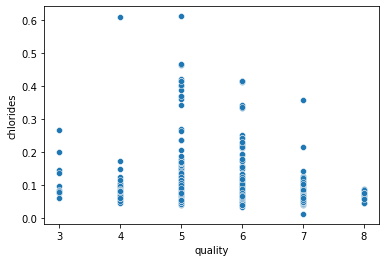


chlorides are contribute target variable
 


In [19]:
sns.scatterplot(data=df,x='quality',y='chlorides')
plt.show()
print('\nchlorides are contribute target variable\n ')

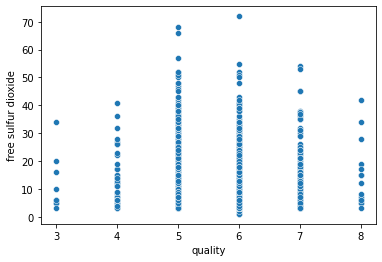


free sulfur are contribute target variable
 


In [20]:
sns.scatterplot(data=df,x='quality',y='free sulfur dioxide')
plt.show()
print('\nfree sulfur are contribute target variable\n ')

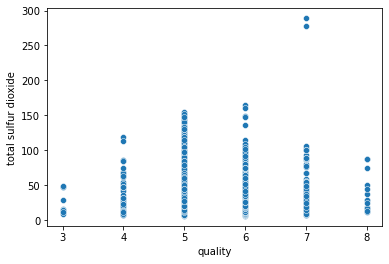


total  sulfur dioxide are contribute target variable
 


In [21]:
sns.scatterplot(data=df,x='quality',y='total sulfur dioxide')
plt.show()
print('\ntotal  sulfur dioxide are contribute target variable\n ')

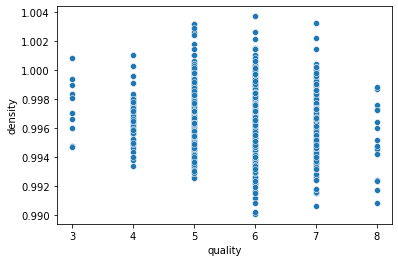


 density are contribute target variable
 


In [22]:
sns.scatterplot(data=df,x='quality',y='density')
plt.show()
print('\n density are contribute target variable\n ')

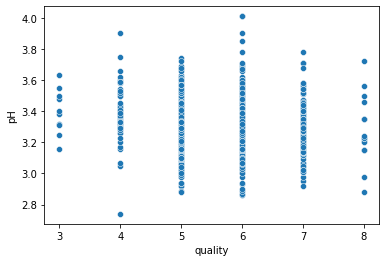


pH are contribute target variable
 


In [23]:
sns.scatterplot(data=df,x='quality',y='pH')
plt.show()
print('\npH are contribute target variable\n ')

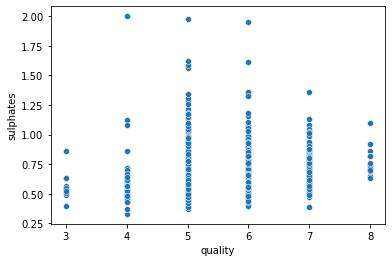


sulphates are contribute target variable
 


In [24]:
sns.scatterplot(data=df,x='quality',y='sulphates')
plt.show()
print('\nsulphates are contribute target variable\n ')

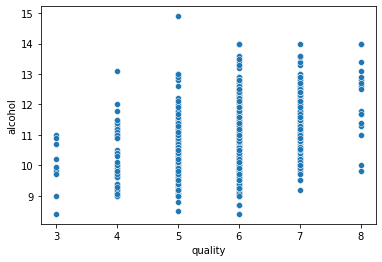


alcohol are contribute target variable
 


In [25]:
sns.scatterplot(data=df,x='quality',y='alcohol')
plt.show()
print('\nalcohol are contribute target variable\n ')

#  All   varible are contribute target variable

# Let's check data is normaly distrubuted or not?

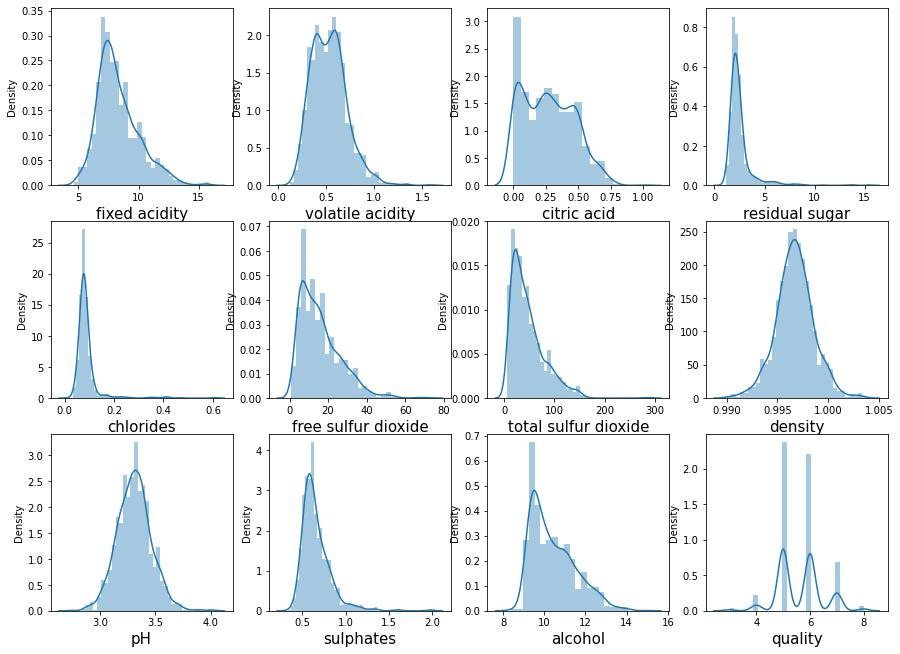

In [26]:
plt.figure(figsize=(15,15))
i=1
for column in df.columns:
    if i<=12:
        
    
         ax=plt.subplot(4,4,i)
    
         sns.distplot(df[column])
    
         plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  There is  right skewed present in the data

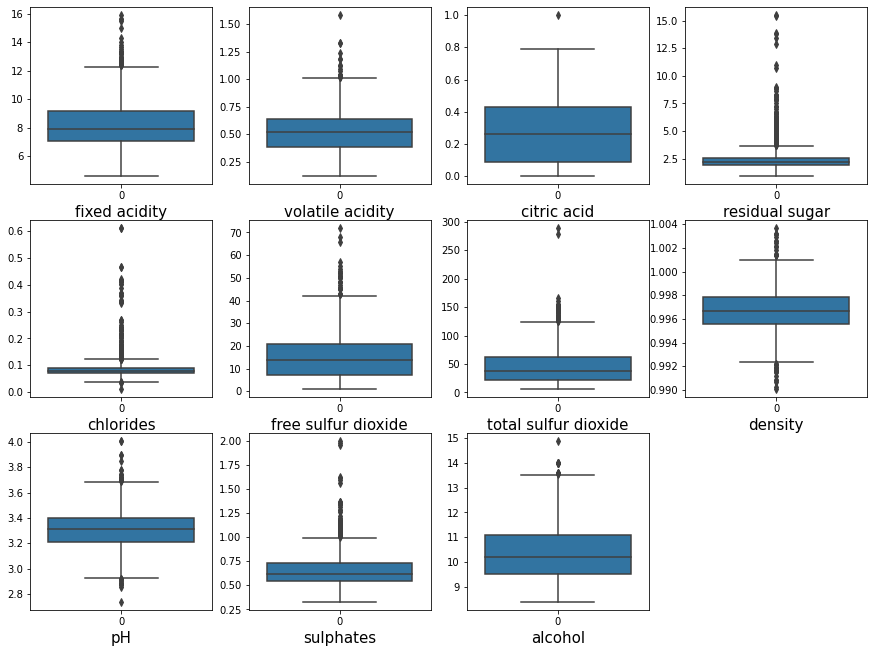

In [27]:
df_featured=df.drop('quality',axis=1)
plt.figure(figsize=(15,15))
i=1
for column in df_featured:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


# There are outliers present in data .

fixed acidity,volatile acidity,citric acid,

residual sugar,free sulfur dioxide,

total sulfur dioxide,sulphates, 

alcohol has Upper limit outliers 


chlorides, density,pH has Upper limit and Lower limit outliers





# Let's check how many columns is outliers and we will decide to remove outliers or not

In [28]:
def count_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    high = q3 + (1.5 * iqr)
    outliers_index = np.where(df[column] > high)
    return len(outliers_index[0])


In [29]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

for column in columns:
   
    print(column, count_outliers(column))
   


fixed acidity 41
volatile acidity 19
citric acid 1
residual sugar 126
free sulfur dioxide 26
total sulfur dioxide 45
chlorides 83
density 17
pH 17
sulphates 55
alcohol 12


# As  we see  to many outliers and we cannot delete this outliers cause if we delete this outliers we also miss to many data 

#  so we check another process

In [30]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

#  skewness value between -0.5 and +0.5 indicates a relatively symmetric distribution so we cannot use this method we will try another method 

Log transform is basically made for right skew data and our data is right skew so we will process this method after train the model and we will compared this will help to improve our accuracy or not

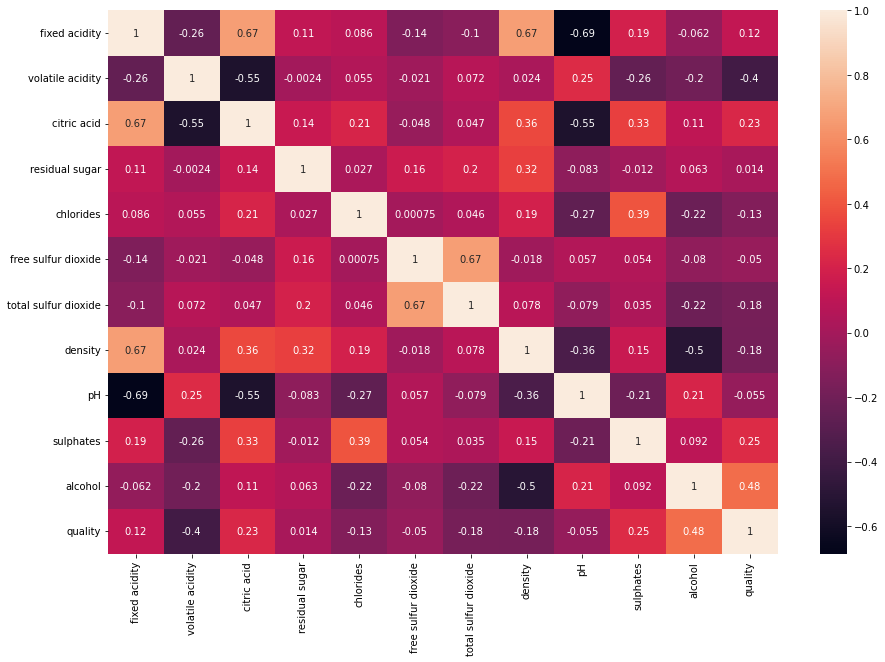

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#  fixed acidity has a strong corelation of citric acid or density but we need more proof 

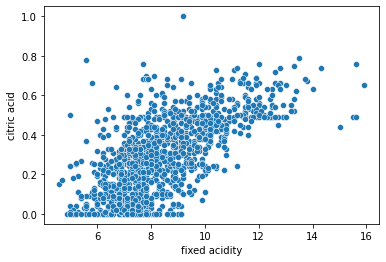

fixed acidity has a strong co-relation of citric acid


In [32]:
sns.scatterplot(data=df,x='fixed acidity',y='citric acid')
plt.show()
print('fixed acidity has a strong co-relation of citric acid')

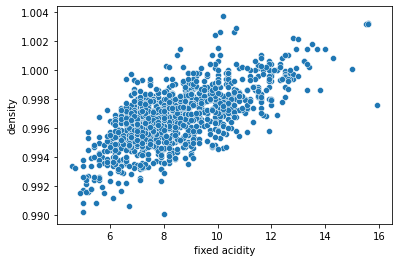

fixed acidity has a strong co-relation of density


In [33]:
sns.scatterplot(data=df,x='fixed acidity',y='density')
plt.show()
print('fixed acidity has a strong co-relation of density')

#  we drop fixed acidity column

In [34]:
df.drop(columns='fixed acidity',axis=1,inplace=True)
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
x.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


# handling data imbalance

In [40]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [41]:
y.value_counts()

5    577
6    577
7    577
4    577
8    577
3    577
Name: quality, dtype: int64

# the data is balanced

# now we can build a model 

# The quality has multi varaible we will use multi classification model

# 
we will use all classification model except logistic regression .

logistic regression is made for binary classification promble

each column range if different so makes the standardise except feature

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8460057747834456 at random_state 22


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [65]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.8209817131857555


[[170   0   0   0   0   0]
 [  1 168   6   2   0   0]
 [  2  12 103  36   3   0]
 [  1   9  46  86  37   4]
 [  0   0   2  20 154   3]
 [  0   0   0   0   2 172]]


In [64]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.8373435996150145


[[170   0   0   0   0   0]
 [  2 168   6   1   0   0]
 [  2  10 109  33   2   0]
 [  0   7  45  93  35   3]
 [  0   0   1  19 158   1]
 [  0   0   0   0   2 172]]


In [63]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.36766121270452357


[[114   0   0  40  16   0]
 [ 71   0  37  33  31   5]
 [ 28   1  68  35  19   5]
 [ 29   0  31  67  34  22]
 [ 26   0  22  36  55  40]
 [ 22   0  16  25  33  78]]


In [66]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.7699711260827719


[[169   0   0   1   0   0]
 [  0 156  13   7   1   0]
 [  3  13  90  46   3   1]
 [  0  10  45  85  32  11]
 [  0   1   1  31 131  15]
 [  0   0   0   1   4 169]]


In [67]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.3387872954764196


[[170   0   0   0   0   0]
 [131   0   0   6  38   2]
 [120   0   0  26  10   0]
 [ 82   0   0  48  33  20]
 [ 15   0   0  32  60  72]
 [  0   0   0  22  78  74]]


In [68]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.7872954764196343


[[169   1   0   0   0   0]
 [  1 169   6   1   0   0]
 [  6  21  91  31   7   0]
 [  1  14  45  80  35   8]
 [  1   0   5  31 135   7]
 [  0   0   0   0   0 174]]


#  Cross Validation Score

In [83]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.79076479 0.80663781 0.80635838 0.81358382 0.80346821]
0.804162600405375
Difference between Accuracy score  and cross validation score is -  0.016819112780380507


In [80]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.38528139 0.33910534 0.38583815 0.33381503 0.31358382]
0.3515247437212755
Difference between Accuracy score  and cross validation score is -  0.016136468983248053


In [74]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.72871573 0.75613276 0.77023121 0.78468208 0.76156069]
0.7602644946575582
Difference between Accuracy score  and cross validation score is -  0.009706631425213663


In [75]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.28138528 0.38961039 0.30780347 0.3150289  0.32514451]
0.3237945099216776
Difference between Accuracy score  and cross validation score is -  0.014992785554742039


In [76]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.74458874 0.75468975 0.7933526  0.75722543 0.76445087]
0.7628614802025206
Difference between Accuracy score  and cross validation score is -  0.024433996217113618


# ExtraTreesClassifier gives 80 percent accuracy and cross validation mean score is 1.6  

#  Hyper Parameter Tunning
# Try to improve more accuracy score

In [86]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters ={'criterion': ['gini','entropy'],
            'random_state': [10,100,850],
            'max_depth':[0,15,30],
            'n_jobs': [-2,-1,1],
            'n_estimators':[50,100,200,300]}



In [90]:
GCV =GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 100, 850]})

In [92]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 850}

In [93]:
Final_model= ExtraTreesClassifier(criterion= 'gini',max_depth= 30,n_estimators = 200  , n_jobs= -2 ,random_state =850)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

83.06063522617902


#  With do hyper parameter tunning accuracy increases 2 percent

In [95]:
import joblib
joblib.dump(Final_model,'Red Wine Quality Prediction Project.pkl')

['Red Wine Quality Prediction Project.pkl']